In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8,7])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,6,1,2,1,2,3,2,3])
df = pd.DataFrame(x1, columns=['x1'])
df['x2'] = x2
df.head()

,x1,x2
0,3,5
1,1,4
2,1,5
3,2,6
4,1,5


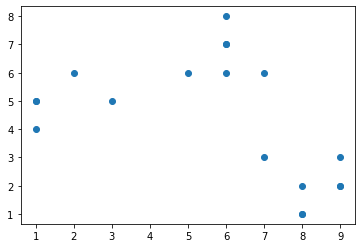

In [5]:
plt.scatter(x1, x2)
plt.show()

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [7]:
km = KMeans(n_clusters=2)
km.fit(df)
print("WCSS = ", sum(np.min(cdist(df, km.cluster_centers_), axis=1))/len(df))
print("BCSS = ", km.inertia_)

WCSS =  1.8493483308938572
BCSS =  78.33766233766234


In [10]:
centroid_df = pd.DataFrame(km.cluster_centers_, columns=['x', 'y'])

In [11]:
df_new = df.copy()
df_new['labels'] = km.predict(df)

In [12]:
df_new

,x1,x2,labels
0,3,5,0
1,1,4,0
2,1,5,0
3,2,6,0
4,1,5,0
5,6,8,0
6,6,6,0
7,6,7,0
8,5,6,0
9,6,7,0


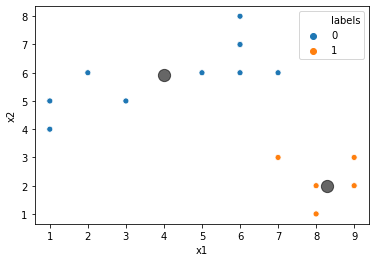

In [13]:
sns.scatterplot(data=df_new, x='x1', y='x2', hue='labels')
plt.scatter(centroid_df['x'], centroid_df['y'], c="black", s=150, alpha=0.6)
plt.show()

In [14]:
bcss = []
for k in range(1, 10):
  km = KMeans(n_clusters=k)
  km.fit(df)
  bcss.append(km.inertia_)

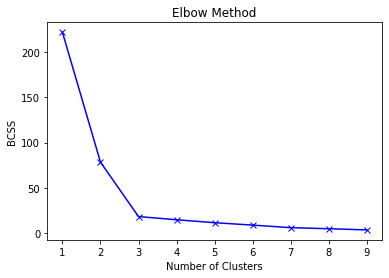

In [15]:
plt.title("Elbow Method")
plt.plot(range(1, 10), bcss, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("BCSS")
plt.show()

WCSS =  0.9203129785571327
BCSS =  17.961904761904762


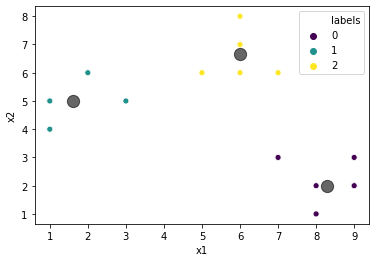

In [17]:
km = KMeans(n_clusters=3)
km.fit(df)
print("WCSS = ", sum(np.min(cdist(df, km.cluster_centers_), axis=1))/len(df))
print("BCSS = ", km.inertia_)
centroid_df = pd.DataFrame(km.cluster_centers_, columns=['x', 'y'])
df_new = df.copy()
df_new['labels'] = km.predict(df)
sns.scatterplot(data=df_new, x='x1', y='x2', hue='labels', palette='viridis')
plt.scatter(centroid_df['x'], centroid_df['y'], c="black", s=150, alpha=0.6)
plt.show()

In [18]:
mall = pd.read_csv('mall.csv')

In [ ]:
mall.head()

In [22]:
bcss = []
for k in range(1, 25):
  km = KMeans(n_clusters=k)
  km.fit(mall)
  bcss.append(km.inertia_)

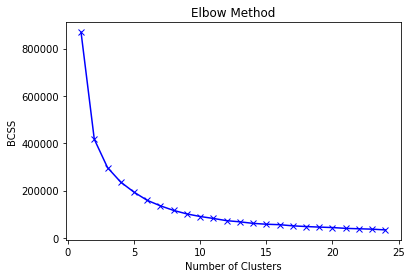

In [23]:
plt.title("Elbow Method")
plt.plot(range(1, 25), bcss, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("BCSS")
plt.show()

WCSS =  226.53681017636342
BCSS =  193333.51167275637


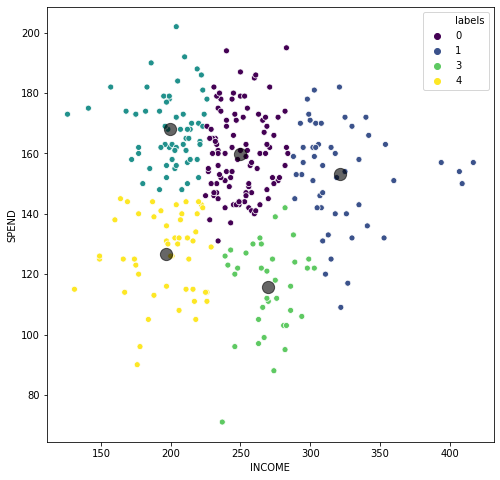

In [26]:
km = KMeans(n_clusters=5)
km.fit(mall)
print("WCSS = ", sum(np.min(cdist(df, km.cluster_centers_), axis=1))/len(df))
print("BCSS = ", km.inertia_)
centroid_df = pd.DataFrame(km.cluster_centers_, columns=['x', 'y'])
mall_new = mall.copy()
mall_new['labels'] = km.predict(mall)
plt.figure(figsize=(8, 8))
sns.scatterplot(data=mall_new, x='INCOME', y='SPEND', hue='labels', palette='viridis')
plt.scatter(centroid_df['x'], centroid_df['y'], c="black", s=150, alpha=0.6)
plt.show()

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()

In [29]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [31]:
x_train, x_test, y_train, y_test = train_test_split(iris_df.drop('target', axis=1), iris_df['target'], test_size=0.3)

In [32]:
iris_df.shape

(150, 5)

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_hat = knn.predict(x_test)
knn.score(x_test, y_test)

0.9333333333333333

In [34]:
for k in range(2, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  print(k, knn.score(x_test, y_test))

2 0.8888888888888888
3 0.9333333333333333
4 0.9555555555555556
5 0.9333333333333333
6 0.9555555555555556
7 0.9555555555555556
8 0.9555555555555556
9 0.9777777777777777
10 0.9555555555555556
11 0.9777777777777777
12 0.9555555555555556
13 0.9777777777777777
14 0.9777777777777777
15 0.9777777777777777
16 0.9555555555555556
17 0.9555555555555556
18 0.9555555555555556
19 0.9777777777777777
